C:\Users\Arish\AppData\Local\Temp\ipykernel_22144\1194847515.py:66: RuntimeWarning: divide by zero encountered in scalar divide
  rrad = r_kpc / DA


Text(0, 0.5, 'log(R/asec)')

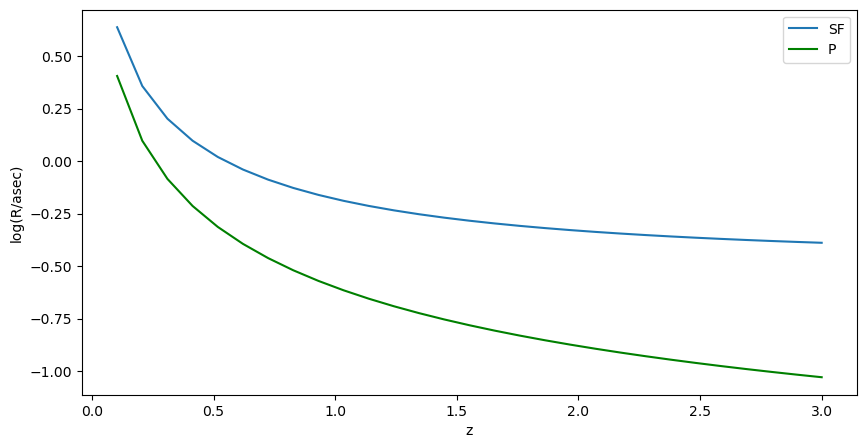

In [27]:
#Problem 3
import math
import matplotlib.pyplot as plt
import numpy as np

#define variables
c = 299792.458 # km/s
#stellar mass, units of solar masses
M_s = 5*10**5
#density parameters
rho_m = 0.3
rho_lam = 0.7
h = 0.7
#Hubble's constant, km/s/Mpc
H_0 = 100*h
#inverse Hubble parameter function
def E_inv(z):
  H =  1/ np.sqrt(rho_m*(1+z)**3 + rho_lam)
  return H
#angular diamter function using equation d_a = d_c/(1+z)
def D_c(z):
    #generate an array of redshifts out to the redshift of interest
    zint = np.linspace(0.0, z, num=100)
    #Hubble distnace
    D_H = 3000./h

    #comoving distance
    D_C = D_H * np.trapezoid(E_inv(zint),zint)
    return D_C

def D_A(z):
    #compute angular diamter distance at a given redshift
    D_a = D_c(z)/(1+z)
    return D_a
    
def R_z(z,SFH = 'SF'):
    #compute the physical radius in kpc at a given redshift
    #have two scenarios, one if the galaxy is starforming(a=8.9, b=-0.75)
    #galaxy could be passive(a=5.6, b = -1.48)
    if (SFH == 'SF'):
        a = 8.9
        b = -0.75
    elif (SFH == 'P'):
        a = 5.6
        b = -1.48

    r_kpc = a * (1+z)**(b)
    return r_kpc
#we want the angular diameter of the galaxy, so we must convert units from kpc to arcsec

def theta(z_r,radunits):
    #since this is going to be over a range of z, we want to put the values into an array
    #make an array for the kpc, which we can then convert to arcsec
    rad_kpc = np.array([])
    rad_arc = np.array([])
    for iz, z in enumerate(z_r):
        #compute the radius in kpc as a function of redshift
        r_kpc = R_z(z,SFH=mySFH)
        rad_kpc = np.append(rad_kpc,r_kpc)
        if radunits == 'asec':
       
            #compute angular diameter distance in Mpc and then convert to kpc
            DA = D_A(z)
            DA = DA * 1000.
            #compute angle in radians
            rrad = r_kpc / DA
            rasec = rrad * 206265.
            #convert to asec
            rad_arc = np.append(rad_arc,rasec)
              

    return rad_arc


from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,1,figsize = (10,5))

zmax = 3
zmin = 0.0
dz = 0.1
nz = int((zmax - zmin)/dz)
zarr = np.linspace(zmin,zmax,num = nz)


myradunits = 'asec'
mySFH = 'SF'
radarr = theta(zarr,myradunits)
ax.plot(zarr,np.log10(radarr),label = mySFH)

mySFH = 'P'
radarr = theta(zarr,myradunits)
ax.plot(zarr,np.log10(radarr),label = mySFH,color='green')

ax.legend()
ax.set_xlabel('z')
ax.set_ylabel('log(R/asec)')    
    

